In [195]:
import os
import urllib.request

import matplotlib.pyplot as plot
import numpy as np

url = 'https://s3.toliak.ru/course-project-2019/images/008_p.png'
path = '../data/008_p.png'

if not os.path.isfile('./file.txt'):
    urllib.request.urlretrieve(url, path)

print('Cache prepared')

def visualize_it(what, label=''):
    plot.figure(figsize=(6,6))
    plot.imshow(what)
    plot.title(label)
    plot.show()

Cache prepared


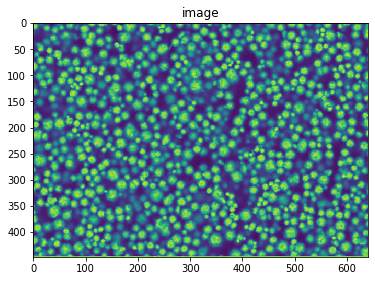

In [196]:
import imageio
from skimage.color import rgb2gray

image = imageio.imread(path)
image = rgb2gray(image)
image *= (255.0/image.max())        # rescale

visualize_it(image, 'image')

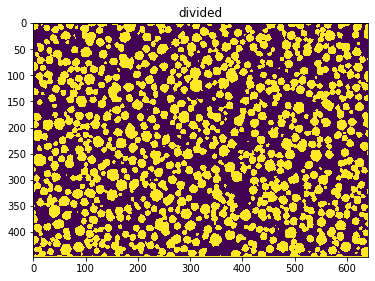

In [197]:
divided = np.full_like(image, 1)

# divided[image < 100] = 2
divided[image < 100] = 0
# divided[image < 20] = 0

visualize_it(divided, 'divided')

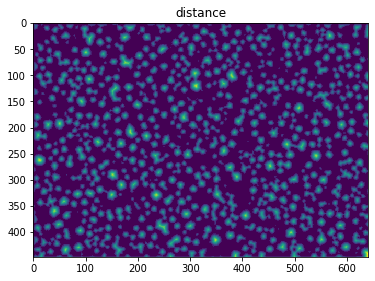

In [198]:
from scipy import ndimage as ndi

distance = ndi.distance_transform_edt(divided)

visualize_it(distance, 'distance')

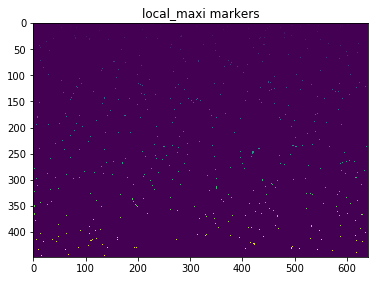

In [199]:
from skimage.feature import peak_local_max

local_maxi = peak_local_max(
    distance,
    indices=False,
)
markers = ndi.label(local_maxi)[0]

visualize_it(markers, 'local_maxi markers')

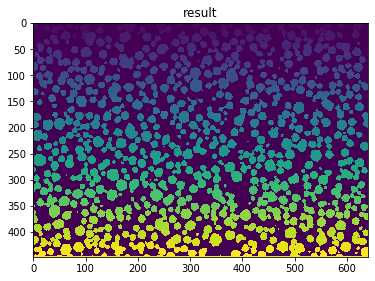

In [200]:
from skimage.morphology import watershed

result = watershed(-distance, markers, mask=divided)

visualize_it(result, 'result')

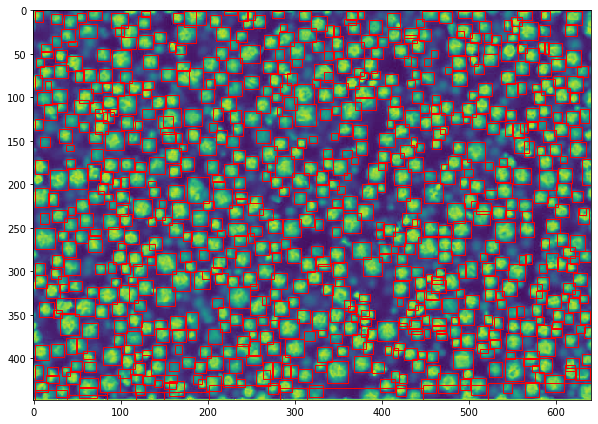

792


In [201]:
from skimage.measure import regionprops
import matplotlib.patches as patches

_, r_plot = plot.subplots(figsize=(10,10)) 
r_plot.imshow(image)


areas = []
counter = 0
for region in regionprops(result):
    if region.area < 50:
        continue
        
    areas.append(region.area)
    
    y1, x1, y2, x2 = region.bbox
    rect = patches.Rectangle(
        (x1, y1),
        x2-x1,
        y2-y1,
        fill=False,
        edgecolor='#ff0000ff',
        linewidth=1,
    )
    
    r_plot.add_patch(rect)
    counter += 1

areas = np.array(areas)

plot.show()
print(counter)